# Exercise Graph Ⅴ
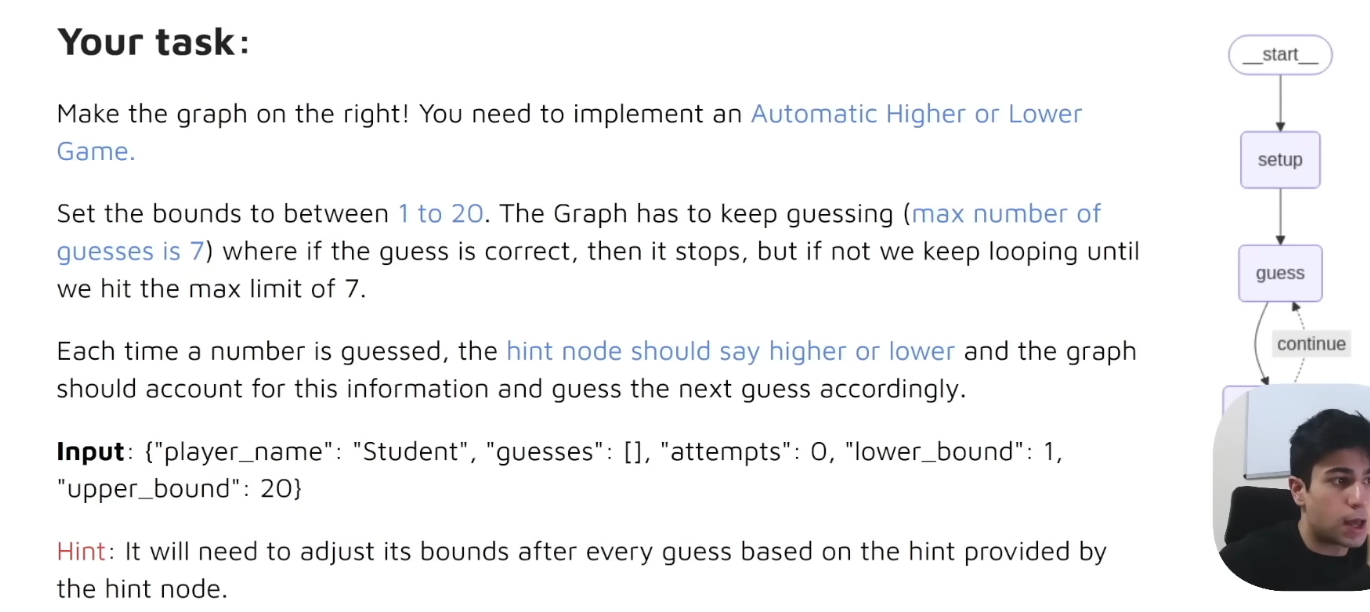

In [7]:
from langgraph.graph import StateGraph, START, END
from typing import List, Optional
from dataclasses import dataclass, field
import random
MAX_APPTEMPTS=11


In [8]:
@dataclass
class AgentState:
    player_name: str
    lower_bound: int = 1
    upper_bound: int = 20
    target_number: Optional[int] = None
    guesses: List[int] = field(default_factory=list)
    attempts: int = 0
    hint: str = ""


In [12]:
def setup_node(state: AgentState) -> AgentState:
    """Initialize game state and pick a random target number."""
    state.guesses = []
    state.target_number = random.randint(state.lower_bound, state.upper_bound)
    state.attempts = 0
    state.hint = ""
    print(
        f"Welcome {state.player_name}! The game has begun. "
        f"I'm thinking of a number between {state.lower_bound} and {state.upper_bound}"
    )
    return state


def guess_node(state: AgentState) -> AgentState:
    """Make a new guess within the current bounds and track attempts."""
    possible_guess = [
        i for i in range(state.lower_bound, state.upper_bound + 1) if i not in state.guesses
    ]
    if possible_guess:
        guess = random.choice(possible_guess)
    else:
        guess = random.randint(state.lower_bound, state.upper_bound)
    state.guesses.append(guess)
    state.attempts += 1
    print(
        f"Attempt {state.attempts}: Guessing {guess} "
        f"(Current range: {state.lower_bound}-{state.upper_bound})"
    )
    return state


def should_continue(state: AgentState) -> Optional[str]:
    """Decide whether to continue guessing or end the game."""
    latest_guess = state.guesses[-1]
    if latest_guess == state.target_number:
        print("GAME OVER: Number found!")
        return "end"
    elif state.attempts >= MAX_APPTEMPTS:
        print(f"GAME OVER: Maximum attempts reached! The number was {state.target_number}")
        return "end"
    else:
        print(f"CONTINUING: {state.attempts}/7 attempts used")
        return "continue"


def hint_node(state: AgentState) -> AgentState:
    """Provide a hint based on the latest guess and tighten bounds."""
    latest_guess = state.guesses[-1]
    target = state.target_number
    if latest_guess < target:
        state.hint = f"The number {latest_guess} is too low, Try higher!"
        state.lower_bound = max(state.lower_bound, latest_guess + 1)
        print(f"Hint: {state.hint}")
    elif latest_guess > target:
        state.hint = f"The number {latest_guess} is too high, Try lower!"
        state.upper_bound = min(state.upper_bound, latest_guess - 1)
        print(f"Hint: {state.hint}")
    else:
        state.hint = f"Correct! You found the number {target} in {state.attempts} attempts."
        print(f"Success! {state.hint}")
    return state


In [13]:
graph=StateGraph(AgentState)
graph.add_node("setup",setup_node)
graph.add_node("guess",guess_node)
graph.add_node("hint",hint_node)

graph.add_edge(START,"setup")
graph.add_edge("setup","guess")
graph.add_edge("guess","hint")
graph.add_conditional_edges(
    "hint",
    should_continue,
    {
        "continue":"guess",
        "end":END
    }
)
app=graph.compile()

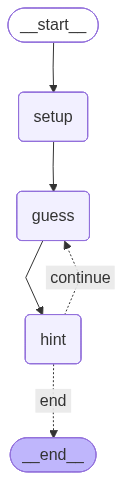

In [14]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
result = app.invoke(AgentState(player_name="Student", lower_bound=1, upper_bound=100))


Welcome Student! The game has begun. I'm thinking of a number between 1 and 100
Attempt 1: Guessing 77 (Current range: 1-100)
Hint: The number 77 is too high, Try lower!
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 43 (Current range: 1-76)
Hint: The number 43 is too high, Try lower!
CONTINUING: 2/7 attempts used
Attempt 3: Guessing 15 (Current range: 1-42)
Hint: The number 15 is too high, Try lower!
CONTINUING: 3/7 attempts used
Attempt 4: Guessing 3 (Current range: 1-14)
Hint: The number 3 is too low, Try higher!
CONTINUING: 4/7 attempts used
Attempt 5: Guessing 6 (Current range: 4-14)
Hint: The number 6 is too low, Try higher!
CONTINUING: 5/7 attempts used
Attempt 6: Guessing 8 (Current range: 7-14)
Hint: The number 8 is too low, Try higher!
CONTINUING: 6/7 attempts used
Attempt 7: Guessing 11 (Current range: 9-14)
Hint: The number 11 is too low, Try higher!
CONTINUING: 7/7 attempts used
Attempt 8: Guessing 14 (Current range: 12-14)
Hint: The number 14 is too high, Try lower!
CO